In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


In [ ]:
from google.colab import files
uploaded=files.upload()

KeyboardInterrupt: ignored

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Reading the data and exploring

In [ ]:
print("No of data points:",df.shape[0])

No of data points: 404290


In [ ]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


# from the above info we have these data fields:
id:row id
 qids: the question ids for q1 and q2 rows
 question{1, 2}:textual contents of the questions.
 is_duplicate:labels for classifying whether the questions are duplicate or not

In [ ]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


Analyzing the data:

In [ ]:
combined_ques_len =combined_ques.apply(lambda x:len(str(x).split(' ')))
quantiles_of_ques=combined_ques_len.quantile([0.25,0.50,0.75,0.99])
print('question_quartiles:')
print(quantiles_of_ques)

question_quartiles:
0.25     87.00
0.50     90.00
0.75    168.00
0.99    242.88
dtype: float64


here we see that the mean is 90 words per question and the length of words that occur in the the 99th percent is 242 so we can keep the upper limit as 243.

# Visualization of the distribution

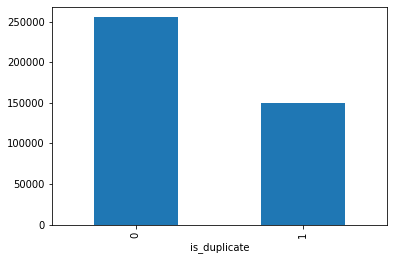

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df.groupby("is_duplicate")['id'].count().plot.bar()


In [ ]:
print("No of total points :",format(len(df)))

No of total points : 404290


I haven't made the train-test split model yet.I am performing analysis on the entire dataset which consists of 44290 data points.

In [ ]:
print("Non-Similar questions :",format(100 - round(df['is_duplicate'].mean()*100, 2)))
print("Similar questions :",format( round(df['is_duplicate'].mean()*100, 2)))

Non-Similar questions : 63.08
Similar questions : 36.92


# Number of unique questions

In [ ]:
qids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
n_unique_q = len(np.unique(qids))
q_morethanonetime=np.sum(qids.value_counts()>1)
print ('Total number of  Unique Questions are:',format(n_unique_q))
print ('no of  questions>1: ',format(q_morethanonetime))
print("Max no of times a type of q repeated",(max(qids.value_counts())))
qids.value_counts()


Total number of  Unique Questions are: 537933
no of  questions>1:  111780
Max no of times a type of q repeated 157


2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64

In [ ]:
percentage=(q_morethanonetime/n_unique_q)*100
print("% of qs more than 1: ",percentage)

% of qs more than 1:  20.77953945937505


# understanding through visualisation

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


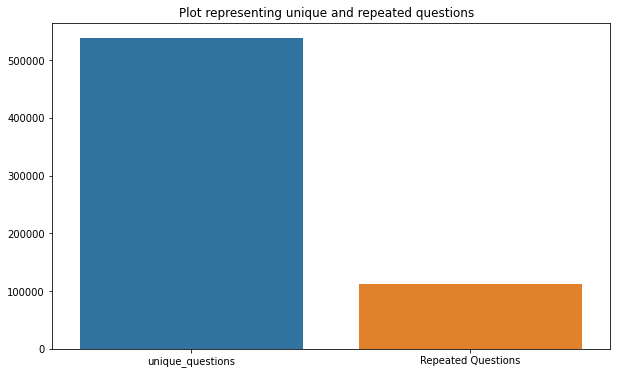

In [ ]:
x = ["unique_questions" , "Repeated Questions"]
y =  [n_unique_q , q_morethanonetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

Checking for duplicate pairs of questions


In [ ]:
pairwise_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(pairwise_duplicates)
print("No of duplicates :",pairwise_duplicates.shape[0]-df.shape[0])

          qid1    qid2  is_duplicate
0            1       2             1
1            3       4             1
2            3  282170             1
3            3  380197             1
4            3  488853             1
...        ...     ...           ...
404285  537924  537925             1
404286  537926  537927             1
404287  537928  537929             1
404288  537930  537931             1
404289  537932  537933             1

[404290 rows x 3 columns]
No of duplicates : 0


# Analysis for the no of occurences of the questions

Maximum no a q is repeated 157


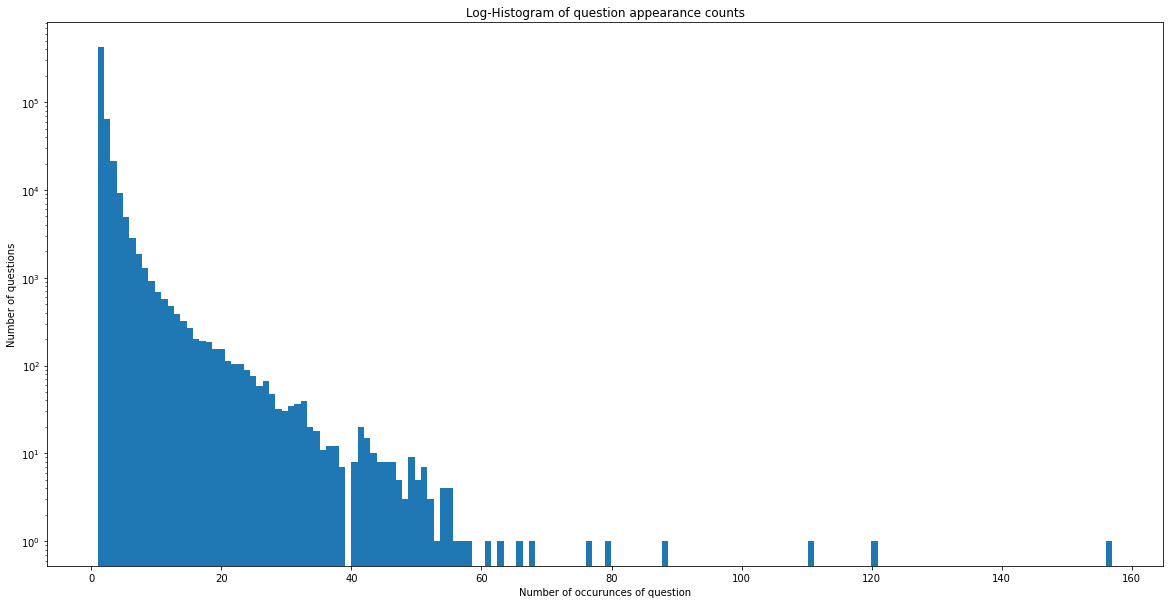

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurunces of question')
plt.ylabel('Number of questions')
print('Maximum no a q is repeated', max(qids.value_counts()))

from the above graph we can see that most of the questions have occurred in the range of 0-40 and then there is a sudden gap.the maximum no of times a question has appeared is 157.The graph is right-skewed and positivily biased.

#More analysis and visulaizations for questions explorations

In [ ]:
combined_ques=pd.DataFrame(pd.concat([df['question1'],df['question2']]))
combined_ques.columns=['questions']
combined_ques['num_of_words']=(combined_ques['questions'].apply(lambda x:len(str(x).split())))
combined_ques
combined_ques['char_of_words']=(combined_ques['questions'].apply(lambda x:len(str(x))))
combined_ques

,questions,num_of_words,char_of_words
0,What is the step by step guide to invest in sh...,14,66
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,8,51
2,How can I increase the speed of my internet co...,14,73
3,Why am I mentally very lonely? How can I solve...,11,50
4,"Which one dissolve in water quikly sugar, salt...",13,76
...,...,...,...
404285,How many keywords are there in PERL Programmin...,13,79
404286,Is it true that there is life after death?,9,42
404287,What's this coin?,3,17
404288,I am having little hairfall problem but I want...,25,127


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of words in the question')

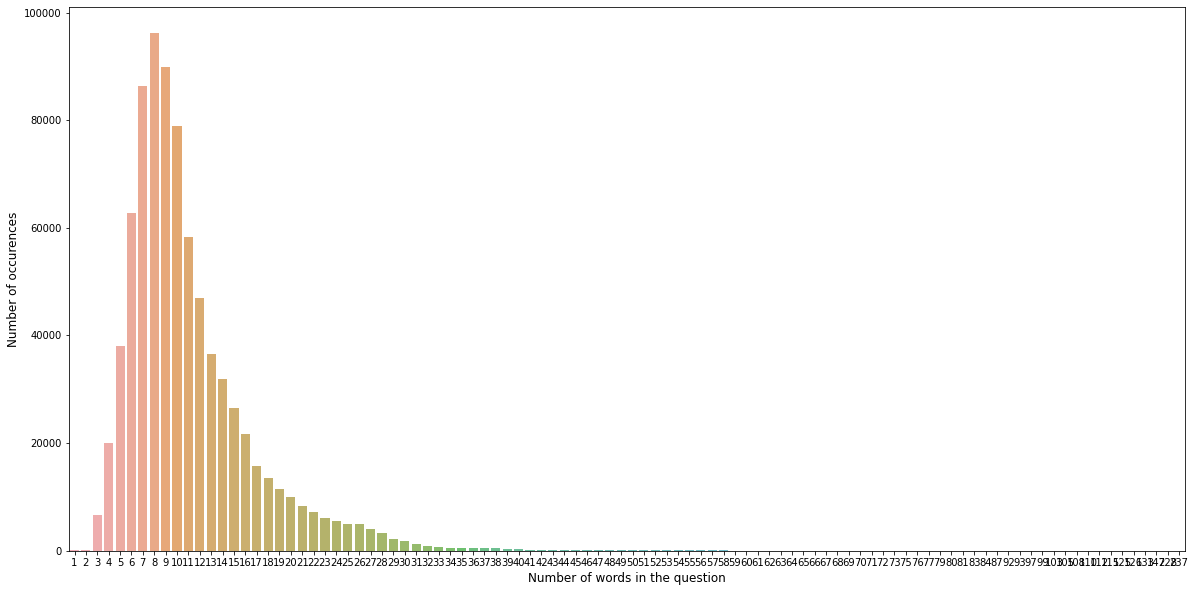

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(combined_ques['num_of_words'].value_counts().index,combined_ques['num_of_words'].value_counts().values,alpha=0.8)
plt.ylabel('Number of occurences',fontsize=12)
plt.xlabel('Number of words in the question',fontsize=12)



here we can see that there are uptil 237 words .the minimum no of words in the sentence is 3.this is a rightly skewed graph again indicating that most of the sentences occuring have a a word range of 6-17 .After that we can see a sharp dip.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of characters in the question')

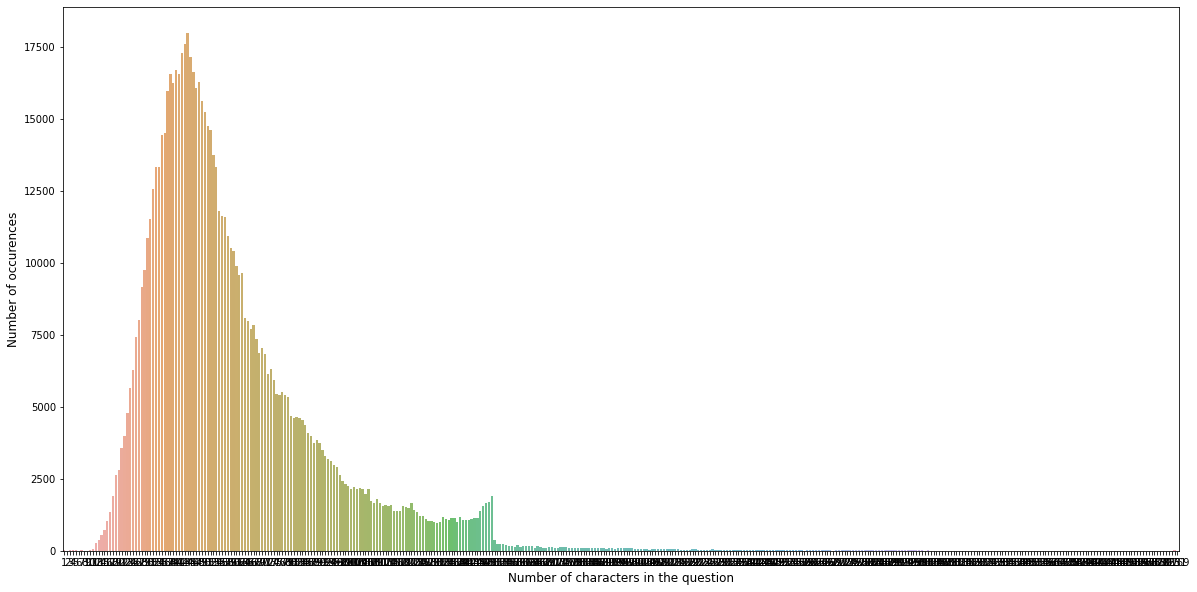

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(combined_ques['char_of_words'].value_counts().index,combined_ques['char_of_words'].value_counts().values,alpha=0.8)
plt.ylabel('Number of occurences',fontsize=12)
plt.xlabel('Number of characters in the question',fontsize=12)


this is again a postive biased (right skewed graph).there seems to be lot of datpoints and that too with continious values.however there is a sharp dip towards the end.not sure about the reason but there can be a conclusion that as of now there aren't a large number of characters present in the dataset

Checking out for null values


In [ ]:
na_row=df[df.isnull().any(1)]
print(na_row)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


In [ ]:
#there are 2 rows in question 2 .it's better to remove them
df=df.fillna('')
na_row=df[df.isnull().any(1)]
print(na_row)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


 and now we don't have any null values.So we can proceed forward for feature extraction.

# Basic feature Extraction(before preprocessing)

In [ ]:
def common_normalized_row(row):
  return len((set(row['question1'].lower().split())).intersection(set(row['question2'].lower().split())))



df['Common_word'] =df.apply(common_normalized_row,axis=1)

def total_no_row(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return 1.0*(len(w1)+len(w2))

df['total_row']=df.apply(total_no_row,axis=1)

def word_share_row(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return 1.0*len(w1 & w2)/(len(w1)+len(w2))
df['Shared_Word'] = df.apply(word_share_row, axis=1)

df['len_q1']=df['question1'].str.len()
df['len_q2']=df['question2'].str.len()


df['Q1_Words']=df['question1'].apply(lambda row : len(row.split(" ")))   # Finding Number of Words in Question 1
df['Q2_Words']=df['question2'].apply(lambda row : len(row.split(" ")))   #Finding no of words in question2

df.to_csv("questions_with_fe_without_preprocessing.csv", index=False)
df.head()


,id,qid1,qid2,question1,question2,is_duplicate,Common_word,total_row,Shared_Word,len_q1,len_q2,Q1_Words,Q2_Words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10,23.0,0.434783,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,20.0,0.200000,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4,24.0,0.166667,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0,19.0,0.000000,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2,20.0,0.100000,76,39,13,7


#Analysis of the feature extracted data


In [ ]:
df.describe()

,id,qid1,qid2,is_duplicate,Common_word,total_row,Shared_Word,len_q1,len_q2,Q1_Words,Q2_Words
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,4.511586,21.126112,0.223362,59.536709,60.108365,10.944592,11.185120
std,116708.614502,157751.700002,159903.182629,0.482588,3.098622,8.592622,0.128336,29.940655,33.863870,5.431949,6.311076
min,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,2.000000,15.000000,0.125000,39.000000,39.000000,7.000000,7.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,4.000000,19.000000,0.217391,52.000000,51.000000,10.000000,10.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,6.000000,25.000000,0.318182,72.000000,72.000000,13.000000,13.000000
max,404289.000000,537932.000000,537933.000000,1.000000,41.000000,166.000000,0.500000,623.000000,1169.000000,125.000000,237.000000


In [ ]:
print("minimum length of q1 question :",min(df['len_q1']))
print("minimum length of q2 question :",min(df['len_q2']))
print("minimum no of words in q1 question :",min(df['Q1_Words']))
print("minimum no of words in q2 question:",min(df['Q2_Words']))



minimum length of q1 question : 0
minimum length of q2 question : 0
minimum no of words in q1 question : 1
minimum no of words in q2 question: 1


The Word-Share feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


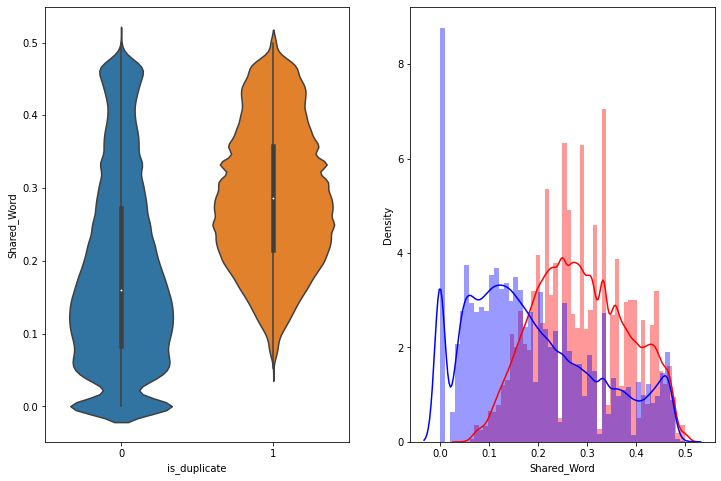

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='Shared_Word',data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['Shared_Word'][0:],label='1',color='red')
sns.distplot(df[df['is_duplicate']==0.0]['Shared_Word'][0:],label='0',color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


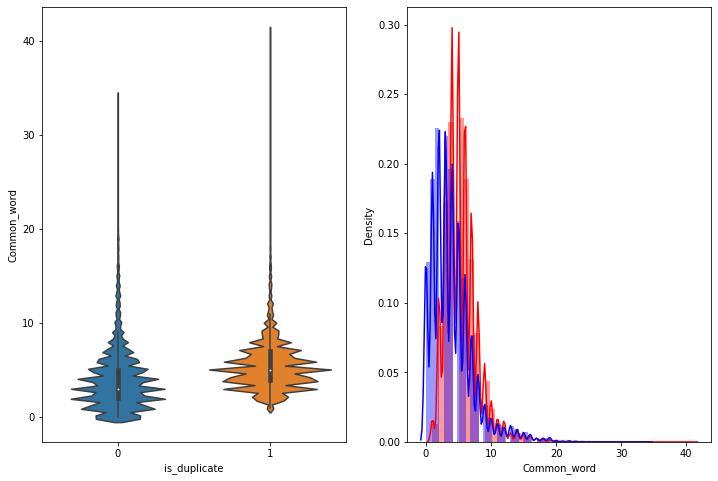

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='Common_word',data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['Common_word'][0:],label='1',color='red')
sns.distplot(df[df['is_duplicate']==0.0]['Common_word'][0:],label='0',color='blue')

the overlap of the curves are more towards the right side of the distribution.this implies there are are a lot of questions with high word similarity.

from the violinplot it can be seen that the average no of shared words , common words are more when the sentences are duplicates or similar to each other.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Log of Number of Occurrences')

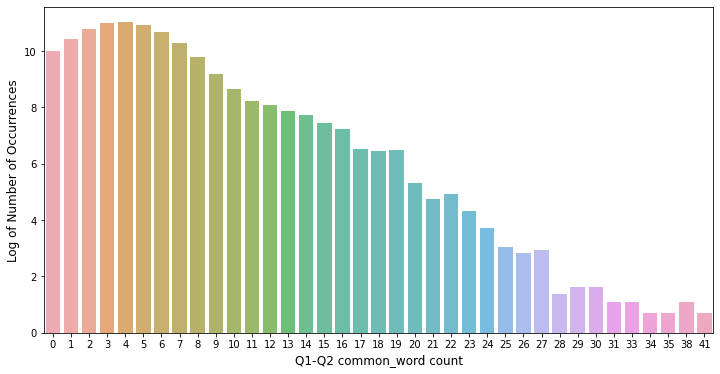

In [ ]:
cnt_srs=df['Common_word'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index,np.log1p(cnt_srs.values),alpha=0.8)
plt.xlabel('Q1-Q2 common_word count', fontsize=12)
plt.ylabel('Log of Number of Occurrences', fontsize=12)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


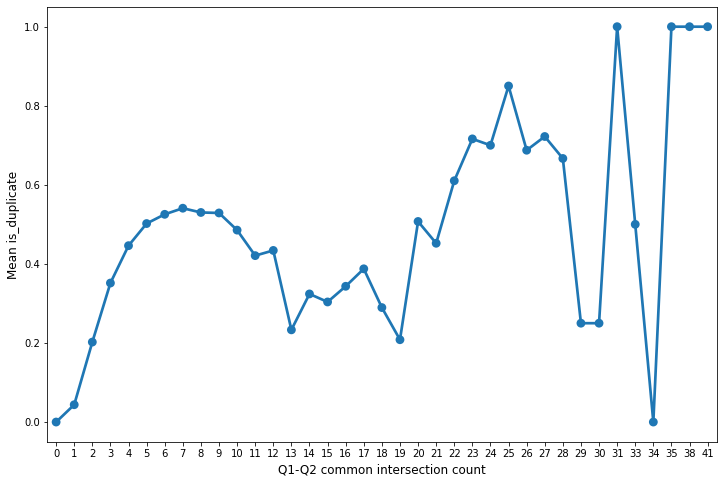

In [ ]:
grouped_df = df.groupby('Common_word')['is_duplicate'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df["Common_word"].values, grouped_df["is_duplicate"].values, alpha=0.8)
plt.ylabel('Mean is_duplicate', fontsize=12)
plt.xlabel('Q1-Q2 common intersection count', fontsize=12)
plt.show()

this graph shows many fluctuation but we can still see that higher no of counts tends towards one so we have can say more no of common words between the two questions are seen in duplicate questions but it is based on what I think.

# Text preprocessing

In [ ]:
from nltk.corpus import stopwords


from nltk.stem import SnowballStemmer
snow=SnowballStemmer('english')
# Creating custom stopwords

stopwords= set(['the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

function to perform stemming while removing StopWords

In [ ]:
def removestopword(word):
  token=word.split()
  removestopcumstemming=[snow.stem(x) for x in token if x not in stopwords]
  after_removal_sentence=" ".join(removestopcumstemming)
  return after_removal_sentence

In [ ]:
import re

def preprocess(x):
    x= str(x).lower()  # Lowering all text to covert all of them to there base form

    # Replacing commonly use words or numbers like 1,000 to 1k and 1,000,000 to 1m and currency symbol to there respective names and many other symbols to there name

    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " is")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("@","at")
    # Renaming 1000 to 1k and 1000000 to 1m (the onces which may not be seperated with commans)
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)


    #Remove any special character like [= , ' ; "" ']

    pattern = re.compile('\W')

    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)

    #Removing Stopwords And Doing Stemming
    x=removestopword(x)

    return x

In [ ]:
df['clean_q1']=df['question1'].apply(preprocess)
df['clean_q2']=df['question2'].apply(preprocess)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,Common_word,total_row,Shared_Word,len_q1,len_q2,Q1_Words,Q2_Words,clean_q1,clean_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10,23.0,0.434783,66,57,14,12,what step step guid invest share market india,what step step guid invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,20.0,0.200000,51,88,8,13,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4,24.0,0.166667,73,59,14,10,how increas speed internet connect use vpn,how internet speed increas hack dns
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0,19.0,0.000000,50,65,11,9,whi mental lone how solv,find remaind when math 23 24 math divid 24 23
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,2,20.0,0.100000,76,39,13,7,which one dissolv water quik sugar salt methan...,which fish would surviv salt water


The cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

questions1=df['clean_q1'][:1000]
questions2=df['clean_q2'][:1000]
vectorizer=TfidfVectorizer()
def cosine_Sim(text1,text2):
  tfidf=vectorizer.fit_transform([text1,text2])
  return ((tfidf*tfidf.T).A)[0,1]

tfidf_scores=[ ]
for i in range(len(questions1)):
  score =cosine_Sim(questions1[i],questions2[i])
  tfidf_scores.append(score)

cosine_similarity_feature = tfidf_scores
print(cosine_similarity_feature)

[0.905549965094206, 0.4611709283793985, 0.4502681446556265, 0.0, 0.23157052612297288, 0.42279475484141277, 0.0, 0.20199309249791833, 1.0000000000000002, 0.3360969272762574, 0.0, 0.5101490193104813, 0.6694188517266485, 0.8181802073667197, 0.8836351388995086, 0.15177836744198991, 1.0000000000000002, 0.3808726084759436, 0.3875569814434229, 0.7168117414430624, 0.5101490193104813, 0.6029748160380572, 0.5101490193104813, 0.0, 0.16839750037215276, 0.8831282039194522, 0.7765145304745156, 0.29121941856368966, 0.7168117414430624, 0.4743307064971939, 0.5031026124151313, 0.41120705506761857, 0.8831282039194522, 0.0, 0.8181802073667197, 0.4031254924501004, 0.5666441608108923, 0.12131675325414235, 0.4112070550676187, 0.12636373966504363, 0.17077611319011649, 0.9999999999999999, 0.6694188517266485, 0.2910691023819054, 0.8350499057520977, 0.3808726084759436, 0.0, 0.0, 0.5803329846765685, 1.0000000000000002, 0.4502681446556265, 0.9561828874675148, 0.0, 0.4502681446556265, 0.0, 0.1059921313509325, 0.125

connecting edges on the basis of simlarity between texts

In [ ]:
import networkx as nx
g=nx.Graph()
for i in range(len(questions1)):
  g.add_nodes_from([questions1[i],questions2[i]])
print(g.nodes())


['what step step guid invest share market india', 'what step step guid invest share market', 'what stori kohinoor koh noor diamond', 'what would happen indian govern stole kohinoor koh noor diamond back', 'how increas speed internet connect use vpn', 'how internet speed increas hack dns', 'whi mental lone how solv', 'find remaind when math 23 24 math divid 24 23', 'which one dissolv water quik sugar salt methan carbon di oxid', 'which fish would surviv salt water', 'astrolog capricorn sun cap moon cap rise what say', 'tripl capricorn sun moon ascend capricorn what say', 'buy tiago', 'what keep childern activ far phone video game', 'how good geologist', 'what great geologist', 'when use シ instead し', 'when use instead', 'motorola compani hack charter motorolla dcx3400', 'how hack motorola dcx3400 free internet', 'method find separ slit use fresnel biprism', 'what thing technician tell durabl reliabl laptop compon', 'how read find youtub comment', 'how see youtub comment', 'what make phy

In [ ]:
for i in range(len(questions1)):
  if score >=0.50:
    g.add_edge(questions1[i],questions2[i])
print(g.edges())

[('what step step guid invest share market india', 'what step step guid invest share market'), ('what stori kohinoor koh noor diamond', 'what would happen indian govern stole kohinoor koh noor diamond back'), ('how increas speed internet connect use vpn', 'how internet speed increas hack dns'), ('whi mental lone how solv', 'find remaind when math 23 24 math divid 24 23'), ('which one dissolv water quik sugar salt methan carbon di oxid', 'which fish would surviv salt water'), ('astrolog capricorn sun cap moon cap rise what say', 'tripl capricorn sun moon ascend capricorn what say'), ('buy tiago', 'what keep childern activ far phone video game'), ('how good geologist', 'what great geologist'), ('when use シ instead し', 'when use instead'), ('motorola compani hack charter motorolla dcx3400', 'how hack motorola dcx3400 free internet'), ('method find separ slit use fresnel biprism', 'what thing technician tell durabl reliabl laptop compon'), ('how read find youtub comment', 'how see youtub c

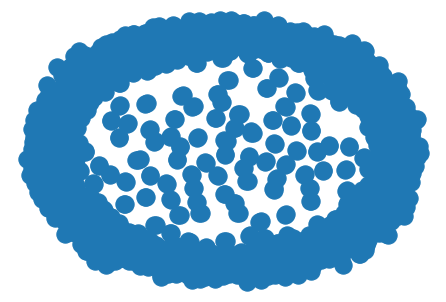

In [ ]:
nx.draw(g)